<a href="https://colab.research.google.com/github/olgamcunha/INFORM/blob/main/Breast_cancer_SQL_Olga_Mariana_Cunha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


**Understanding Breast Cancer Patterns from a dataset**

Breast cancer is one of the most common cancers among women worldwide, representing a significant public health challenge. It originates from the epithelial cells of the breast tissue and can vary in its aggressiveness and prognosis. Early detection through screening programs and advances in diagnostic tools have improved outcomes, but breast cancer remains a leading cause of cancer-related mortality.

Key factors influencing breast cancer risk include age, genetic predisposition, hormonal status, and lifestyle factors. Clinically, the disease is categorized based on tumor size, lymph node involvement, and metastatic spread, which determine the stage and inform treatment decisions. Understanding the underlying patterns and correlations in clinical data is crucial for advancing research, improving patient outcomes, and tailoring therapies to individual needs.

This project aims to analyze a breast cancer dataset obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia and which is available at UC Irvine Nachine Learning Repository.



The following table represents the processed and structured data derived from the breast cancer raw dataset.

Each row corresponds to a patient record, with features describing the patient's demographics, tumor characteristics, such as tumor size, involved lymph nodes, degree of malignancy and location.

In [3]:
import duckdb
import plotly.express as px
import seaborn as sns
conn = duckdb.connect()
query = """
CREATE TABLE BreastCancer AS
SELECT
    column0 AS Class,
    column1 AS age,
    column2 AS menopause,
    column3 AS tumor_size,
    column4 AS inv_nodes,
    column5 AS node_caps,
    column6 AS deg_maling,
    column7 AS breast,
    column8 AS breast_quad,
    column9 AS irradiant
FROM read_csv_auto('/content/breast-cancer.data');
"""
conn.execute(query)
query = """
select *
from BreastCancer
"""
df = conn.sql(query).df()
df

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_maling,breast,breast_quad,irradiant
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,False
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,False
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,False
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,False
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,False
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,False
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,True
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,False
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,False


The graphs presented below aim to provide insights into clinically relevant variables within the breast cancer dataset. This analysis highlights the relationships between tumor characteristics, patient demographics, and disease classification (benign vs. malignant). By examining these patterns, we can better understand key factors associated with breast cancer progression and prognosis.

In [12]:
#class distribution

import plotly.express as px

# Create the class distribution chart with colorblind-friendly colors
fig = px.histogram(
    df,
    x='Class',
    color='Class',
    title='Class Distribution',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe  # Colorblind-friendly palette
)

# Update layout to add title, labels, and position the legend below
fig.update_layout(
    title_text='Class Distribution',
    title_x=0.5,  # Center the title
    xaxis_title='Class',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='h',  # Horizontal legend
        y=-0.2,           # Position below the chart
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

# Display the chart
fig.show()




In [21]:
# Age distribution

import plotly.express as px

# Create an age distribution plot
fig = px.histogram(
    df,
    x='age',
    title='Age Distribution',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'age': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']}  # Correct age order
)

# Update layout to add title, labels, and customize appearance
fig.update_layout(
    title_text='Age Distribution',
    title_x=0.5,  # Center the title
    xaxis_title='Age Group',
    yaxis_title='Count',
    showlegend=False  # No legend needed for a single variable
)

# Display the chart
fig.show()


In [14]:
# Class vs Age

# Define the correct order for the age groups
age_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create the Class vs. Age plot with ordered age groups
fig = px.histogram(
    df,
    x='age',
    color='Class',
    title='Class vs. Age Distribution',
    barmode='group',  # Grouped bars for better comparison
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'age': age_order}  # Explicitly set the order of age groups
)

# Update layout to add title, labels, and position the legend below
fig.update_layout(
    title_text='Class vs. Age Distribution',
    title_x=0.5,  # Center the title
    xaxis_title='Age Group',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='h',  # Horizontal legend
        y=-0.2,           # Position below the chart
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

# Display the chart
fig.show()



In [16]:
#Class vs menopause

# Define the new order for the menopause categories
menopause_order = ['premeno', 'lt40', 'ge40']

# Create the Class vs. Menopause plot with ordered menopause categories
fig = px.histogram(
    df,
    x='menopause',
    color='Class',
    title='Class vs. Menopause Distribution',
    barmode='group',  # Grouped bars for better comparison
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'menopause': menopause_order}  # Explicitly set the new order of menopause categories
)

# Update layout to add title, labels, and position the legend below
fig.update_layout(
    title_text='Class vs. Menopause Distribution',
    title_x=0.5,  # Center the title
    xaxis_title='Menopause Stage',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='h',  # Horizontal legend
        y=-0.2,           # Position below the chart
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

# Display the chart
fig.show()



In [22]:
import plotly.express as px

# Create a grouped bar chart for Tumor Size vs. Class
fig = px.histogram(
    df,
    x='tumor_size',
    color='Class',
    title='Tumor Size vs. Class Distribution',
    barmode='group',  # Grouped bars for better comparison
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'tumor_size': sorted(df['tumor_size'].unique())}  # Ensure tumor sizes are ordered
)

# Update layout to add title, labels, and position the legend below
fig.update_layout(
    title_text='Tumor Size vs. Class Distribution',
    title_x=0.5,  # Center the title
    xaxis_title='Tumor Size',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='h',  # Horizontal legend
        y=-0.2,           # Position below the chart
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

# Display the chart
fig.show()


In [26]:
# tumor size vs inv nodes

import plotly.express as px

# Create a heatmap for Tumor Size vs. Inv Nodes
heatmap_data = df.groupby(['tumor_size', 'inv_nodes']).size().reset_index(name='count')

fig = px.density_heatmap(
    heatmap_data,
    x='tumor_size',
    y='inv_nodes',
    z='count',
    color_continuous_scale='Viridis',  # Colorblind-friendly color scale
    title='Tumor Size vs. Inv Nodes',
    labels={'count': 'Frequency'},
)

# Update layout for better appearance
fig.update_layout(
    title_text='Tumor Size vs. Inv Nodes',
    title_x=0.5,  # Center the title
    xaxis_title='Tumor Size',
    yaxis_title='Involved Nodes',
    coloraxis_colorbar_title='Count',
    font=dict(size=12)  # Consistent font size for readability
)

# Display the heatmap
fig.show()




In [27]:
# Malignancy vs class

import plotly.express as px

# Create a grouped bar chart for Malignancy vs. Class
fig = px.histogram(
    df,
    x='deg_maling',  # 'deg_maling' refers to degree of malignancy
    color='Class',
    title='Malignancy vs. Class Distribution',
    barmode='group',  # Grouped bars for better comparison
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe  # Colorblind-friendly palette
)

# Update layout to add title, labels, and position the legend below
fig.update_layout(
    title_text='Malignancy vs. Class Distribution',
    title_x=0.5,  # Center the title
    xaxis_title='Degree of Malignancy',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='h',  # Horizontal legend
        y=-0.2,           # Position below the chart
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

# Display the chart
fig.show()




<ipython-input-34-a1824d07f8d4>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




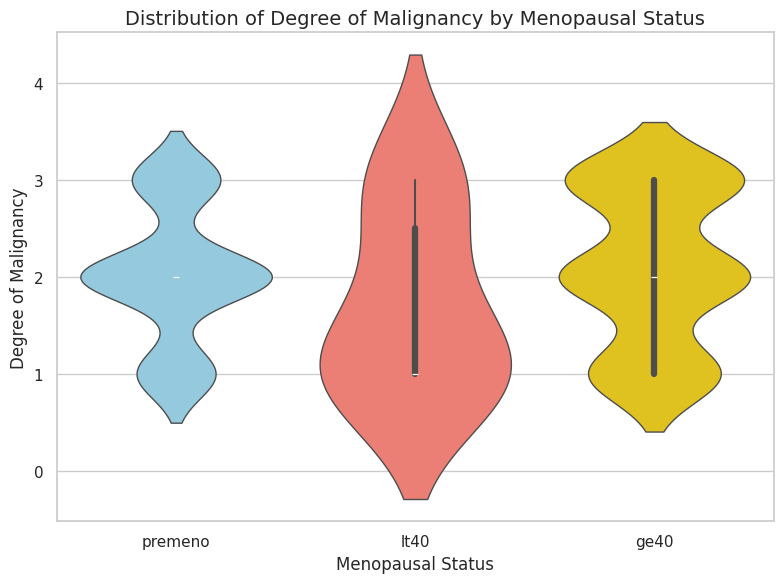

In [34]:
#menopause vs malignancy

import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors: light blue, red, and light yellow
custom_palette = ['#87CEEB', '#FF6F61', '#FFD700']  # Light blue, red, and light yellow

# Create the figure and axes
plt.figure(figsize=(8, 6))

# Create a violin plot using Seaborn
sns.violinplot(
    data=df,
    x='menopause',
    y='deg_maling',  # Degree of malignancy
    order=['premeno', 'lt40', 'ge40'],  # Order with lt40 in the middle
    palette=custom_palette,  # Use the custom colors
    inner='box',  # Display a boxplot inside the violins
    linewidth=1  # Make the edges clearer
)

# Add title and labels
plt.title('Distribution of Degree of Malignancy by Menopausal Status', fontsize=14)
plt.xlabel('Menopausal Status', fontsize=12)
plt.ylabel('Degree of Malignancy', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

